In [ ]:
from google.colab import drive
drive.mount('/content/drive')   

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWiVUkh_BK4h5b1F-SJwHW7Qki-_viFJESyE5Way4gMKRnvPSEWb4y4


In [ ]:
%cd /content/drive/Shareddrives/NLP

/content/drive/Shareddrives/NLP


# Skip sampe ada tulisan mulai dari sini

In [ ]:
pip install textdistance --quiet

In [ ]:
import pandas as pd
import numpy as np
import textdistance
import re
from collections import Counter

In [ ]:
words = []
with open('book.txt', 'r') as f:
    file_name_data = f.read()
    file_name_data=file_name_data.lower()
    words = re.findall('\w+',file_name_data)
# This is our vocabulary
V = set(words)
print(f"20 Kata Pertama dalam Buku Moby Dick: \n{words[:20]}")
print(f"\nTerdapat {len(V)} kata yang unik di dalam Vocabulary.") 

20 Kata Pertama dalam Buku Moby Dick: 
['the', 'project', 'gutenberg', 'ebook', 'of', 'moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of']

Terdapat 17647 kata yang unik di dalam Vocabulary.


In [ ]:
word_freq_dict = {}  
word_freq_dict = Counter(words)
print(word_freq_dict.most_common()[0:10])

[('the', 14703), ('of', 6742), ('and', 6517), ('a', 4799), ('to', 4707), ('in', 4238), ('that', 3081), ('it', 2534), ('his', 2530), ('i', 2120)]


In [ ]:
word_freq_dict

Counter({'the': 14703,
         'project': 91,
         'gutenberg': 94,
         'ebook': 10,
         'of': 6742,
         'moby': 90,
         'dick': 90,
         'or': 797,
         'whale': 1230,
         'by': 1222,
         'herman': 4,
         'melville': 4,
         'this': 1439,
         'is': 1751,
         'for': 1644,
         'use': 49,
         'anyone': 6,
         'anywhere': 16,
         'at': 1335,
         'no': 594,
         'cost': 4,
         'and': 6517,
         'with': 1769,
         'almost': 197,
         'restrictions': 2,
         'whatsoever': 7,
         'you': 958,
         'may': 255,
         'copy': 19,
         'it': 2534,
         'give': 90,
         'away': 186,
         're': 18,
         'under': 126,
         'terms': 33,
         'license': 18,
         'included': 14,
         'online': 4,
         'www': 6,
         'org': 13,
         'title': 8,
         'author': 9,
         'release': 1,
         'date': 4,
         'december': 5,
   

In [ ]:
probs = {}     
Total = sum(word_freq_dict.values())    
for k in word_freq_dict.keys():
    probs[k] = word_freq_dict[k]/Total

In [ ]:
def my_autocorrect(input_word):
    input_word = input_word.lower()
    if input_word in V:
        return('Your word seems to be correct')
    else:
        similarities = [1-(textdistance.Jaccard(qval=2).distance(v,input_word)) for v in word_freq_dict.keys()]
        df = pd.DataFrame.from_dict(probs, orient='index').reset_index()
        df = df.rename(columns={'index':'Word', 0:'Prob'})
        df['Similarity'] = similarities
        output = df.sort_values(['Similarity'], ascending=False).head()
        return(output)

In [ ]:
my_autocorrect("learnen")

,Word,Prob,Similarity
923,learned,0.000112,0.714286
4918,learn,0.000040,0.666667
6235,earned,0.000013,0.571429
5912,learnt,0.000004,0.571429
17078,clearness,0.000004,0.555556


In [ ]:
df = pd.DataFrame.from_dict(probs, orient='index').reset_index()
df

,index,0
0,the,0.066033
1,project,0.000409
2,gutenberg,0.000422
3,ebook,0.000045
4,of,0.030279
...,...,...
17642,confirmed,0.000004
17643,pg,0.000004
17644,includes,0.000004
17645,subscribe,0.000004


In [ ]:
def autocorrect(input_word):
    input_word = input_word.lower()
    if input_word in V:
        return('Your word seems to be correct')
    else:
        similarities = [1-(textdistance.ratcliff_obershelp(qval=2).distance(v,input_word)) for v in word_freq_dict.keys()]
        df = pd.DataFrame.from_dict(probs, orient='index').reset_index()
        df = df.rename(columns={'index':'Word', 0:'Prob'})
        df['Similarity'] = similarities
        output = df.sort_values(['Similarity', 'Prob'], ascending=False).head()
        return(output)

In [ ]:
autocorrect("lond")

In [ ]:
similarities = [1-(textdistance.Jaccard(qval=2).distance(v,"blenc")) for v in word_freq_dict.keys()]
similarities

In [ ]:
token1="hello world".split()
token2="world hellodwafa".split()

textdistance.Jaccard(qval=2).distance(token1, token2)

In [ ]:
import nltk
from nltk.corpus import words
from nltk.metrics.distance import (
    edit_distance,
    jaccard_distance,
    )
from nltk.util import ngrams
nltk.download('words')
import pandas

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
correct_spellings = words.words()
spellings_series = pandas.Series(correct_spellings)
spellings_series

0                 A
1                 a
2                aa
3               aal
4             aalii
            ...    
236731       yellow
236732          yes
236733    yesterday
236734          you
236735        young
Length: 236736, dtype: object

In [ ]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

In [ ]:
path = '/content/drive/Shareddrives/NLP/1661-0.txt'
text = open(path).read().lower()
print('corpus length:', len(text))

corpus length: 581888


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

In [ ]:
words

['project',
 'gutenberg',
 's',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'by',
 'arthur',
 'conan',
 'doyle',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'net',
 'title',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'author',
 'arthur',
 'conan',
 'doyle',
 'release',
 'date',
 'november',
 '29',
 '2002',
 'ebook',
 '1661',
 'last',
 'updated',
 'may',
 '20',
 '2019',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'utf',
 '8',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'produced',
 'by',
 'an',
 'ano

In [ ]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [ ]:
unique_word_index['good']

1865

In [ ]:
WORD_LENGTH = 4
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the']
adventures


In [ ]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

In [ ]:
unique_word_index['s']

3511

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [ ]:
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=20, shuffle=True).history

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
283/283 [==============================] - 10s 19ms/step - loss: 6.2142 - accuracy: 0.0822 - val_loss: 6.0928 - val_accuracy: 0.1162
Epoch 2/20
283/283 [==============================] - 5s 17ms/step - loss: 5.5481 - accuracy: 0.1300 - val_loss: 5.9926 - val_accuracy: 0.1257
Epoch 3/20
283/283 [==============================] - 5s 17ms/step - loss: 5.2048 - accuracy: 0.1647 - val_loss: 6.1483 - val_accuracy: 0.1162
Epoch 4/20
283/283 [==============================] - 5s 17ms/step - loss: 4.9378 - accuracy: 0.2133 - val_loss: 6.4875 - val_accuracy: 0.1230
Epoch 5/20
283/283 [==============================] - 5s 17ms/step - loss: 4.6582 - accuracy: 0.2723 - val_loss: 6.6784 - val_accuracy: 0.1088
Epoch 6/20
283/283 [==============================] - 5s 17ms/step - loss: 4.3450 - accuracy: 0.3417 - val_loss: 7.0494 - val_accuracy: 0.0994
Epoch 7/20
283/283 [==============================] - 5s 17ms/step - loss: 4.0305 - accuracy: 0.4061 - val_loss: 7.1081 - val_accuracy: 0.103

In [ ]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

In [ ]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x

In [ ]:
prepare_input("It is not a".lower()) 

it
is
not
a


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)

    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [ ]:

def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = unique_word_index[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [ ]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_word_index[idx] + predict_completion(text[1:] + unique_word_index[idx]) for idx in next_indices]

In [ ]:
# predict_completion("which does not")

In [ ]:
quotes = [
    "It is hard enough"
]

# Referensi Baru

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import library yang diperlukan

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras import backend as K

In [ ]:
pd.set_option('display.max_colwidth', 0)

Load dataset

In [ ]:
!cp -R "/content/drive/Shareddrives/NLP/Dataset" .

In [ ]:
!wget https://object.pouta.csc.fi/OPUS-OpenSubtitles/v2018/mono/id.txt.gz
!gzip -dk id.txt.gz

--2021-12-02 10:42:31--  https://object.pouta.csc.fi/OPUS-OpenSubtitles/v2018/mono/id.txt.gz
Resolving object.pouta.csc.fi (object.pouta.csc.fi)... 86.50.254.18, 86.50.254.19
Connecting to object.pouta.csc.fi (object.pouta.csc.fi)|86.50.254.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227979172 (217M) [application/gzip]
Saving to: ‘id.txt.gz.1’

id.txt.gz.1         100%[===================>] 217.42M  63.7MB/s    in 3.7s    

2021-12-02 10:42:35 (58.1 MB/s) - ‘id.txt.gz.1’ saved [227979172/227979172]



In [ ]:
# !wget https://pcai056.informatik.uni-leipzig.de/downloads/corpora/ind_wikipedia_2021_1M.tar.gz
# !tar -xvf ind_wikipedia_2021_1M.tar.gz

--2021-12-02 09:02:45--  https://pcai056.informatik.uni-leipzig.de/downloads/corpora/ind_wikipedia_2021_1M.tar.gz
Resolving pcai056.informatik.uni-leipzig.de (pcai056.informatik.uni-leipzig.de)... 139.18.2.216
Connecting to pcai056.informatik.uni-leipzig.de (pcai056.informatik.uni-leipzig.de)|139.18.2.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 207297373 (198M) [application/x-gzip]
Saving to: ‘ind_wikipedia_2021_1M.tar.gz’

ind_wikipedia_2021_ 100%[===================>] 197.69M  24.4MB/s    in 8.8s    

2021-12-02 09:02:54 (22.4 MB/s) - ‘ind_wikipedia_2021_1M.tar.gz’ saved [207297373/207297373]



In [ ]:
# medium_data = pd.read_csv('/content/drive/Shareddrives/NLP/medium_data.csv')
# medium_data.head()

In [ ]:
# df_corpora = pd.read_csv('Dataset/ind_wikipedia_2021_10K-sentences.txt', names = ["id", "dokumen"], sep='\t')
df_corpora_raw = pd.read_csv('id.txt', names = ["dokumen"], sep='\t')

In [ ]:
# df_corpora = df_corpora.sample(n = 20000)
df_corpora = df_corpora_raw[((df_corpora_raw["dokumen"].str.len() <= 220) & (df_corpora_raw["dokumen"].str.len() >= 30))].sample(n = 12000)
df_corpora

,dokumen
2487168,Aku akan jelaskan padamu caraku bekerja.
5754052,"Semua, kita perlu penjaga untuk berpatroli di ..."
18219565,Jika Red Sox lulus dengan pilihan pertama mere...
11826524,Ia tidak mau mendengarkan siapa pun.
18461762,Aku membuat kesepakatan untuk menyelamatkanmu ...
...,...
3985695,Seni mereka tidak pernah berlangsung.
14497089,"Terlalu banyak orang, mereka semua akan tertawa!"
12315425,Karena Hoon Dong bukanlah orang yang kompeten
632880,Saya mengenal/mengetahui anda mempunyai itu di...


In [ ]:
df_corpora

,dokumen
2487168,Aku akan jelaskan padamu caraku bekerja.
5754052,"Semua, kita perlu penjaga untuk berpatroli di perimeter."
18219565,Jika Red Sox lulus dengan pilihan pertama mereka Aku tahu tahu Phillip benar-benar ingin membawanya.
11826524,Ia tidak mau mendengarkan siapa pun.
18461762,Aku membuat kesepakatan untuk menyelamatkanmu yg tak tahu berterima kasih untuk menyelamatkan lehermu barang sejenak.
...,...
3985695,Seni mereka tidak pernah berlangsung.
14497089,"Terlalu banyak orang, mereka semua akan tertawa!"
12315425,Karena Hoon Dong bukanlah orang yang kompeten
632880,Saya mengenal/mengetahui anda mempunyai itu di/dalam anda.


Tokenisasi Seluruh kata yang terdapat pada medium_data["title"]

In [ ]:
tokenizer = Tokenizer(lower = True, oov_token='<oov>') # For those words which are not found in word_index
tokenizer.fit_on_texts(df_corpora["dokumen"])
total_words = len(tokenizer.word_index) + 1

In [ ]:
total_words

12273

In [ ]:
tokenizer.word_index["<oov>"]

1

In [ ]:
tokenizer.word_index

{'<oov>': 1,
 'aku': 2,
 'yang': 3,
 'kau': 4,
 'dan': 5,
 'ini': 6,
 'tidak': 7,
 'di': 8,
 'akan': 9,
 'itu': 10,
 'dia': 11,
 'kita': 12,
 'untuk': 13,
 'bisa': 14,
 'apa': 15,
 'tak': 16,
 'dengan': 17,
 'mereka': 18,
 'ada': 19,
 'dari': 20,
 'anda': 21,
 'orang': 22,
 'tahu': 23,
 'saya': 24,
 'tapi': 25,
 'kami': 26,
 'ke': 27,
 'jika': 28,
 'harus': 29,
 'adalah': 30,
 'sudah': 31,
 'dalam': 32,
 'ingin': 33,
 'seperti': 34,
 'semua': 35,
 'kamu': 36,
 'jadi': 37,
 'hanya': 38,
 'lebih': 39,
 'pada': 40,
 'sekarang': 41,
 'baik': 42,
 'karena': 43,
 'sini': 44,
 'benar': 45,
 'hal': 46,
 'pergi': 47,
 'kalian': 48,
 'satu': 49,
 'lagi': 50,
 'mungkin': 51,
 'pernah': 52,
 'bagaimana': 53,
 'punya': 54,
 'saja': 55,
 'saat': 56,
 'melihat': 57,
 'telah': 58,
 'menjadi': 59,
 'bukan': 60,
 'bahwa': 61,
 'hari': 62,
 'sangat': 63,
 'banyak': 64,
 'tentang': 65,
 'lakukan': 66,
 'atau': 67,
 'kalau': 68,
 'jangan': 69,
 'mau': 70,
 'kembali': 71,
 'sesuatu': 72,
 'melakukan': 73,
 

In [ ]:
input_sequences = []
for line in df_corpora['dokumen']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    # print(token_list)
    # print(len(token_list))
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# print(input_sequences)
# print("Total input sequences: \n", len(input_sequences))

In [ ]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
# [print(input_sequences[i]) for i in input_sequences]

In [ ]:
max_sequence_len #Sequence Terpanjang itu 38

36

In [ ]:
input_sequences #disamain panjang vektor tiap sequence

array([[    0,     0,     0, ...,     0,     2,     9],
       [    0,     0,     0, ...,     2,     9,  1459],
       [    0,     0,     0, ...,     9,  1459,   123],
       ...,
       [    0,     0,     0, ...,     9,   188, 12272],
       [    0,     0,     0, ...,   188, 12272,     6],
       [    0,     0,     0, ..., 12272,     6,    35]], dtype=int32)

In [ ]:
# create features and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = to_categorical(labels, num_classes=total_words)

In [ ]:
ys[5]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
xs

array([[    0,     0,     0, ...,     0,     0,     2],
       [    0,     0,     0, ...,     0,     2,     9],
       [    0,     0,     0, ...,     2,     9,  1459],
       ...,
       [    0,     0,     0, ...,    26,     9,   188],
       [    0,     0,     0, ...,     9,   188, 12272],
       [    0,     0,     0, ...,   188, 12272,     6]], dtype=int32)

In [ ]:
labels

array([    9,  1459,   123, ..., 12272,     6,    35], dtype=int32)

In [ ]:
# optimizer = RMSprop(lr=0.01)
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=20, shuffle=True).history

In [ ]:
# model = Sequential()
# model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
# model.add(Dense(len(unique_words)))
# model.add(Activation('softmax'))

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_sequence_len-1))
model.add(LSTM(128))
model.add(Dropout(0.1))
model.add(Dense(total_words, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 10)            122730    
                                                                 
 lstm (LSTM)                 (None, 128)               71168     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 12273)             1583217   
                                                                 
Total params: 1,777,115
Trainable params: 1,777,115
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def perplexity(y_true, y_pred):
    cross_entropy = tf.losses.categorical_crossentropy(y_true, y_pred)
    perplexity = tf.exp(tf.reduce_mean(cross_entropy))
    return perplexity

In [ ]:
optimizer = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[perplexity])

In [ ]:
history = model.fit(xs, ys, validation_split=0.05, batch_size=16, epochs=48, verbose=1, shuffle=True)

Epoch 1/48
4811/4811 [==============================] - 75s 15ms/step - loss: 7.2413 - perplexity: 2033.1189 - val_loss: 7.0871 - val_perplexity: 2500.5237
Epoch 2/48
4811/4811 [==============================] - 70s 15ms/step - loss: 6.5890 - perplexity: 1026.1136 - val_loss: 7.1585 - val_perplexity: 4258.2417
Epoch 3/48
4811/4811 [==============================] - 71s 15ms/step - loss: 6.0933 - perplexity: 587.9243 - val_loss: 7.3104 - val_perplexity: 6883.6538
Epoch 4/48
4811/4811 [==============================] - 70s 15ms/step - loss: 5.6343 - perplexity: 355.6165 - val_loss: 7.6376 - val_perplexity: 15211.3105
Epoch 5/48
4811/4811 [==============================] - 70s 15ms/step - loss: 5.2223 - perplexity: 229.2652 - val_loss: 8.0777 - val_perplexity: 35246.2734
Epoch 6/48
4811/4811 [==============================] - 70s 15ms/step - loss: 4.8742 - perplexity: 158.9880 - val_loss: 8.4046 - val_perplexity: 63973.8047
Epoch 7/48
4811/4811 [==============================] - 70s 15ms/

dict_keys(['loss', 'perplexity', 'val_loss', 'val_perplexity'])


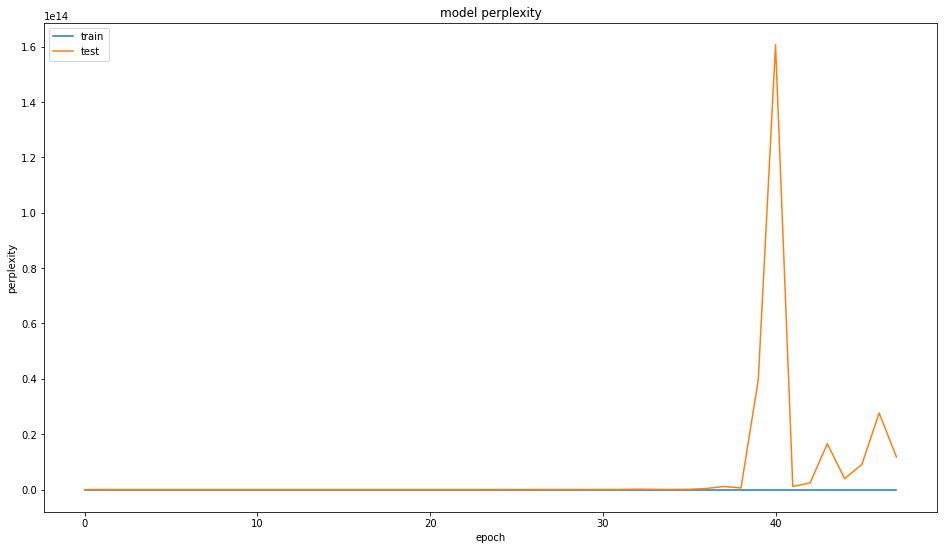

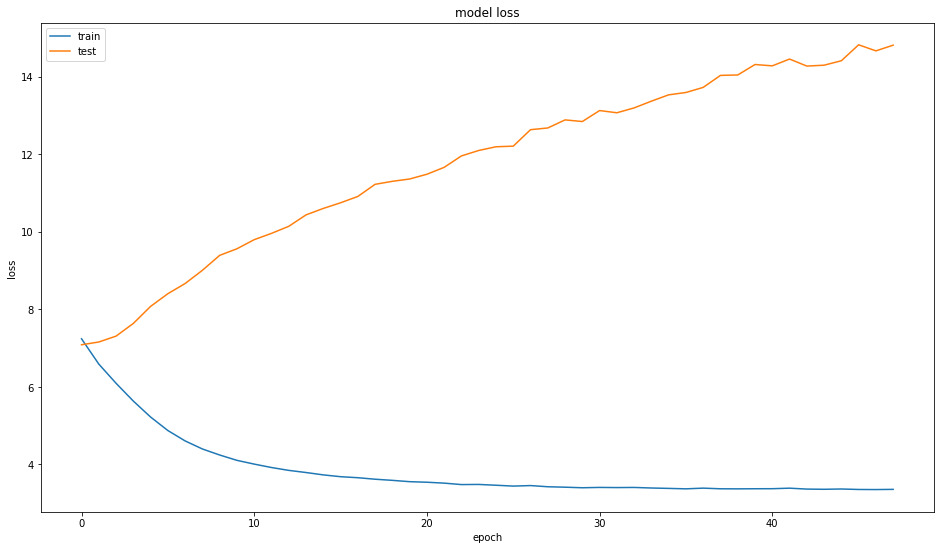

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(16,9))
plt.plot(history.history['perplexity'])
plt.plot(history.history['val_perplexity'])
plt.title('model perplexity')
plt.ylabel('perplexity')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# model = load_model('keras_next_word_model.h5')
# history = pickle.load(open("history.p", "rb"))

In [ ]:
print(model)

In [ ]:
def generate_text(seed_text, next_words, max_sequence_len, model):
    for j in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0),axis=1)
  
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

In [ ]:
seed_text = "Indonesia adalah negara"
next_words = 5

generate_text(seed_text, next_words, max_sequence_len, model)

'Indonesia adalah negara yang kita lewati dan dibunuh'

In [ ]:
seed_text = "Jeruk berwarna"
next_words = 3

generate_text(seed_text, next_words, max_sequence_len, model)

'Jeruk berwarna biru melintangi ketegangannya'

In [ ]:
seed_text = "Ikan hidup di"
next_words = 3

generate_text(seed_text, next_words, max_sequence_len, model)

'Ikan hidup di luar dan ada'

In [ ]:
seed_text = "Matahari berwarna"
next_words = 3

generate_text(seed_text, next_words, max_sequence_len, model)

'Matahari berwarna yang tak berdosa'

In [ ]:
seed_text = "Bunga berwarna"
next_words = 3

generate_text(seed_text, next_words, max_sequence_len, model)

'Bunga berwarna biru itu akan'

In [ ]:
seed_text = "Kereta berbunyi"
next_words = 3

generate_text(seed_text, next_words, max_sequence_len, model)

'Kereta berbunyi lisbon yang terbuat'

In [ ]:
seed_text = "Hari senin memakai seragam berwarna"
next_words = 3

generate_text(seed_text, next_words, max_sequence_len, model)

'Hari senin memakai seragam berwarna ketidak bersalahanmu dengan'

In [ ]:
seed_text = "Kupu-kupu berwarna"
next_words = 3

generate_text(seed_text, next_words, max_sequence_len, model)

'Kupu-kupu berwarna biru itu adalah'

In [ ]:
seed_text = "Dia bernama"
next_words = 3

generate_text(seed_text, next_words, max_sequence_len, model)

'Dia bernama kami dan terakhirmu'

In [ ]:
seed_text = "Ia berbicara"
next_words = 3

generate_text(seed_text, next_words, max_sequence_len, model)

'Ia berbicara dengan hal ini'

In [ ]:
seed_text = "Ia sedang"
next_words = 3

generate_text(seed_text, next_words, max_sequence_len, model)

'Ia sedang mengatur pencahayaan untuk'

In [ ]:
seed_text = "Ia pergi"
next_words = 3

generate_text(seed_text, next_words, max_sequence_len, model)

'Ia pergi ke norfolk anda'

In [ ]:
seed_text = "Ia menyukai"
next_words = 5

generate_text(seed_text, next_words, max_sequence_len, model)

'Ia menyukai kami menggali dan aku akan'

In [ ]:
seed_text = "Wanita itu sedang"
next_words = 3

generate_text(seed_text, next_words, max_sequence_len, model)

'Wanita itu sedang menembus segalanya bagi'

In [ ]:
seed_text = "Anak itu bermain"
next_words = 3

generate_text(seed_text, next_words, max_sequence_len, model)

'Anak itu bermain korban ini yang'

In [ ]:
seed_text = "Sore itu"
next_words = 3

generate_text(seed_text, next_words, max_sequence_len, model)

'Sore itu untuk toretto korban'

In [ ]:
seed_text = "Ibu"
next_words = 5

generate_text(seed_text, next_words, max_sequence_len, model)

'Ibu tidak ada yang beristirahat di'

In [ ]:
seed_text = "Indonesia"
next_words = 3

generate_text(seed_text, next_words, max_sequence_len, model)

'Indonesia ini kau yakin'

In [ ]:
seed_text = "Orang jahat"
next_words = 5

generate_text(seed_text, next_words, max_sequence_len, model)

'Orang jahat membutuhkan kursi selama enam tahun'

In [ ]:
seed_text = "Orang baik"
next_words = 5

generate_text(seed_text, next_words, max_sequence_len, model)

'Orang baik yang kau inginkan dariku itu'

In [ ]:
seed_text = "Ia tidak"
next_words = 5

generate_text(seed_text, next_words, max_sequence_len, model)

'Ia tidak akan pernah meninggalkan kapal ini'